## Otros datos

In [52]:
import plotly.express as px
from sklearn import datasets
import pandas as pd

# Cargamos el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convertimos a un DataFrame de Pandas
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Creamos un gráfico 3D interactivo
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)',
                    color='species')

# Mostrar el gráfico
fig.show()

Filtro los datos a los que necesito para el ejercicio, borramos las filas "setosa"

In [53]:
#renombro el df
column_names = df.columns.tolist()
print("Nombres de columnas de características:", column_names)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width','class']

#filtro, quito versicolor
iris_df_filtered = df[df['class'] != 'setosa']
if 'setosa' in iris_df_filtered['class'].cat.categories:
    iris_df_filtered['class'] = iris_df_filtered['class'].cat.remove_categories(['setosa'])

#defino X & y
X = iris_df_filtered.drop(columns=['class'])
y = iris_df_filtered['class']


#Vemos sus caracteristicas
print(X.describe())
print(y.describe())
print(y.value_counts())

Nombres de columnas de características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
       sepal length  sepal width  petal length  petal width
count    100.000000   100.000000    100.000000   100.000000
mean       6.262000     2.872000      4.906000     1.676000
std        0.662834     0.332751      0.825578     0.424769
min        4.900000     2.000000      3.000000     1.000000
25%        5.800000     2.700000      4.375000     1.300000
50%        6.300000     2.900000      4.900000     1.600000
75%        6.700000     3.025000      5.525000     2.000000
max        7.900000     3.800000      6.900000     2.500000
count            100
unique             2
top       versicolor
freq              50
Name: class, dtype: object
class
versicolor    50
virginica     50
Name: count, dtype: int64


<Axes: >

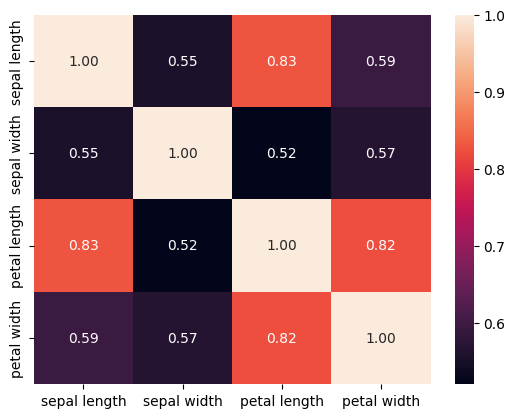

In [54]:
import seaborn as sns
sns.heatmap(X.corr(), annot=True, fmt='.2f')


Vemos que en esta matriz de confucion hay diferentes correlaciones y aplicamos nuevamente el VIF

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Asumiendo que 'X' es tu DataFrame y ya tiene las columnas de interés

df_with_const = add_constant(X)

# Calcula el VIF para cada variable predictora
vif_data = pd.DataFrame()  # Usa 'pd.DataFrame()' en lugar de 'X.DataFrame()'
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)

       Variable         VIF
0         const  125.170277
1  sepal length    3.990113
2   sepal width    1.721954
3  petal length    7.252447
4   petal width    3.948354


Eliminar la variable "petal length" ya que es la que tiene el VIF más alto, al hacer esto nos quedamos con variables más importantes

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Asumiendo que 'X' es tu DataFrame y ya tiene las columnas de interés
VIX = X[['sepal length', 'sepal width', 'petal width']]
df_with_const = add_constant(VIX)

# Calcula el VIF para cada variable predictora
vif_data = pd.DataFrame()  # Usa 'pd.DataFrame()' en lugar de 'X.DataFrame()'
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)

       Variable         VIF
0         const  122.240203
1  sepal length    1.730834
2   sepal width    1.649553
3   petal width    1.766067


En este caso todas tiene un VIF muy cercano a 1, lo que es perfecto ya que 1 represneta que no existe multicolinealidad (en el rango de 1 a 5)

<Axes: >

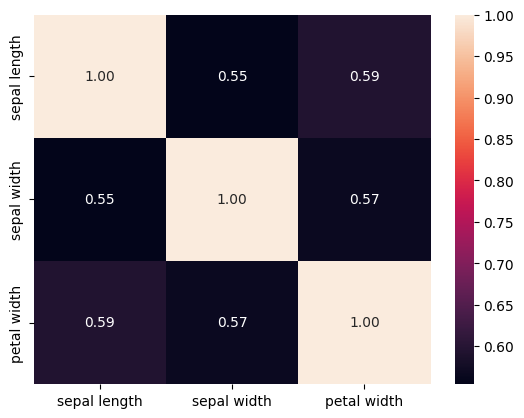

In [57]:
sns.heatmap(VIX.corr(), annot=True, fmt='.2f')

Nos quendamos nuevamente con las variables más importates.

In [58]:
iris_df_filtered = iris_df_filtered.drop(columns = ["petal length"]) # Quito la columna petal length del df

Me quedo con VIX, como la svaribles explicativas, y las etiquetas e iris_df como el data frame

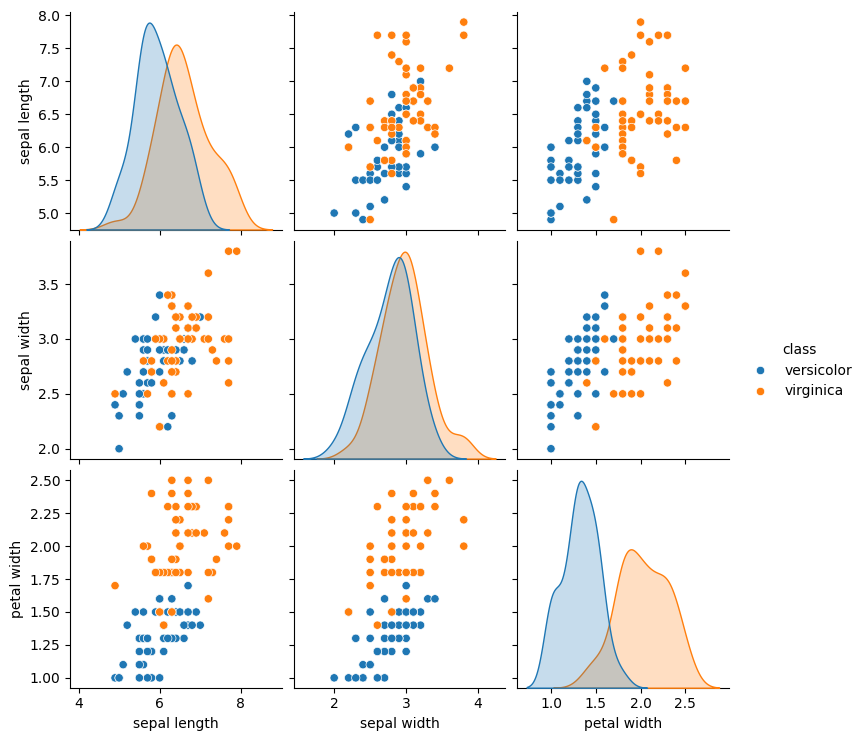

In [59]:
import matplotlib.pyplot as plt
sns.pairplot(iris_df_filtered, hue='class')  
plt.show()

En este caso se ve que los datos estan mucho más juntos y es realmente dificil separalos lienalmente.

## Implementación del modelo

In [60]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC

In [80]:
iris_df_filtered.head()

,sepal length,sepal width,petal width,class
50,7.0,3.2,1.4,versicolor
51,6.4,3.2,1.5,versicolor
52,6.9,3.1,1.5,versicolor
53,5.5,2.3,1.3,versicolor
54,6.5,2.8,1.5,versicolor


In [63]:
import plotly.express as px
import pandas as pd

fig = px.scatter_3d(iris_df_filtered, x='sepal length', y='sepal width', z='petal width',
                    color='class', symbol='class')


# Mostrar el gráfico
fig.show()

Y aun graficando 3D se ven los datos muy pegado.

In [64]:
import plotly.express as px
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly.graph_objs as go


# Codificamos las etiquetas de clase
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(iris_df_filtered['class'])

# Entrenamos el clasificador SVM con un kernel lineal
clf = svm.SVC(kernel='linear')
clf.fit(iris_df_filtered[['sepal length', 'sepal width', 'petal width']], y_encoded)

# Coeficientes del hiperplano
w = clf.coef_[0]
v = clf.intercept_

# Creamos un gráfico 3D interactivo usando plotly express
fig = px.scatter_3d(iris_df_filtered, x='sepal length', y='sepal width', z='petal width',
                    color='class', symbol='class')

# Creamos la malla para el hiperplano
xx, yy = np.meshgrid(np.linspace(iris_df_filtered['sepal length'].min(), iris_df_filtered['sepal length'].max(), 50),
                     np.linspace(iris_df_filtered['sepal width'].min(), iris_df_filtered['sepal width'].max(), 50))
zz = (-w[0] * xx - w[1] * yy - v) / w[2]

# Añadimos el hiperplano al gráfico
fig.add_traces(go.Surface(x=xx, y=yy, z=zz, name='SVM Hyperplane', opacity=0.5, showscale=False))

# Mostrar el gráfico
fig.show()

Y podemos ver como aun con todos los datos hiperplano dado por SVM comote muchos errores.

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


iris_df = iris_df_filtered.sample(frac=1).reset_index(drop=True)

# Separa las clases
versicolor = iris_df[iris_df['class'] == 'versicolor']
virginica = iris_df[iris_df['class'] == 'virginica']

# Selecciona 5 muestras aleatorias de cada clase para el conjunto de prueba
versicolor_test = versicolor.sample(5)
virginica_test = virginica.sample(5)

# Concatena las muestras de prueba en un único DataFrame
test_df = pd.concat([versicolor_test, virginica_test])

# Elimina las muestras de prueba del DataFrame original para obtener el conjunto de entrenamiento
train_df = iris_df.drop(test_df.index)

# Ahora tienes tus conjuntos de entrenamiento y prueba
print("Conjunto de Entrenamiento:")
print(train_df)
print("\nConjunto de Prueba:")
print(test_df)

# Si necesitas las características y las etiquetas por separado:
X_train = train_df[['sepal length', 'sepal width', 'petal width']]
y_train = train_df['class']
X_test = test_df[['sepal length', 'sepal width', 'petal width']]
y_test = test_df['class']

Conjunto de Entrenamiento:
    sepal length  sepal width  petal width       class
0            6.2          2.9          1.3  versicolor
1            6.4          3.2          2.3   virginica
3            6.7          3.3          2.1   virginica
4            6.0          3.0          1.8   virginica
5            5.9          3.2          1.8  versicolor
..           ...          ...          ...         ...
94           5.2          2.7          1.4  versicolor
95           5.7          2.5          2.0   virginica
97           6.9          3.2          2.3   virginica
98           6.2          3.4          2.3   virginica
99           5.6          3.0          1.5  versicolor

[90 rows x 4 columns]

Conjunto de Prueba:
    sepal length  sepal width  petal width       class
47           5.4          3.0          1.5  versicolor
79           6.5          2.8          1.5  versicolor
72           6.0          3.4          1.6  versicolor
49           6.1          2.8          1.3  versi

Separo los datos en entrenamiento y testeo para escalarlos.

## Preprocesamiento

In [81]:
X_train.shape

min_on_training = X_train.min(axis=0)
min_on_training.shape

range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training.shape

X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))

print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0.]
Maximum for each feature
 [1. 1. 1.]


In [82]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [83]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.958
Accuracy on test set: 0.833


Entrenamos un modelo con los parametros por defecto y vemos que su puntaje Accuracy (datos bien clasificados / todos los datos)

In [89]:
svc_C01 = SVC(C=.001)
svc_C01.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc_C01.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc_C01.score(X_test_scaled, y_test)))

Accuracy on training set: 0.514
Accuracy on test set: 0.444


Provando con un $C$ diferente vemos como empeora, ahora veremos unos graficos que los mostratan de mejor forma.

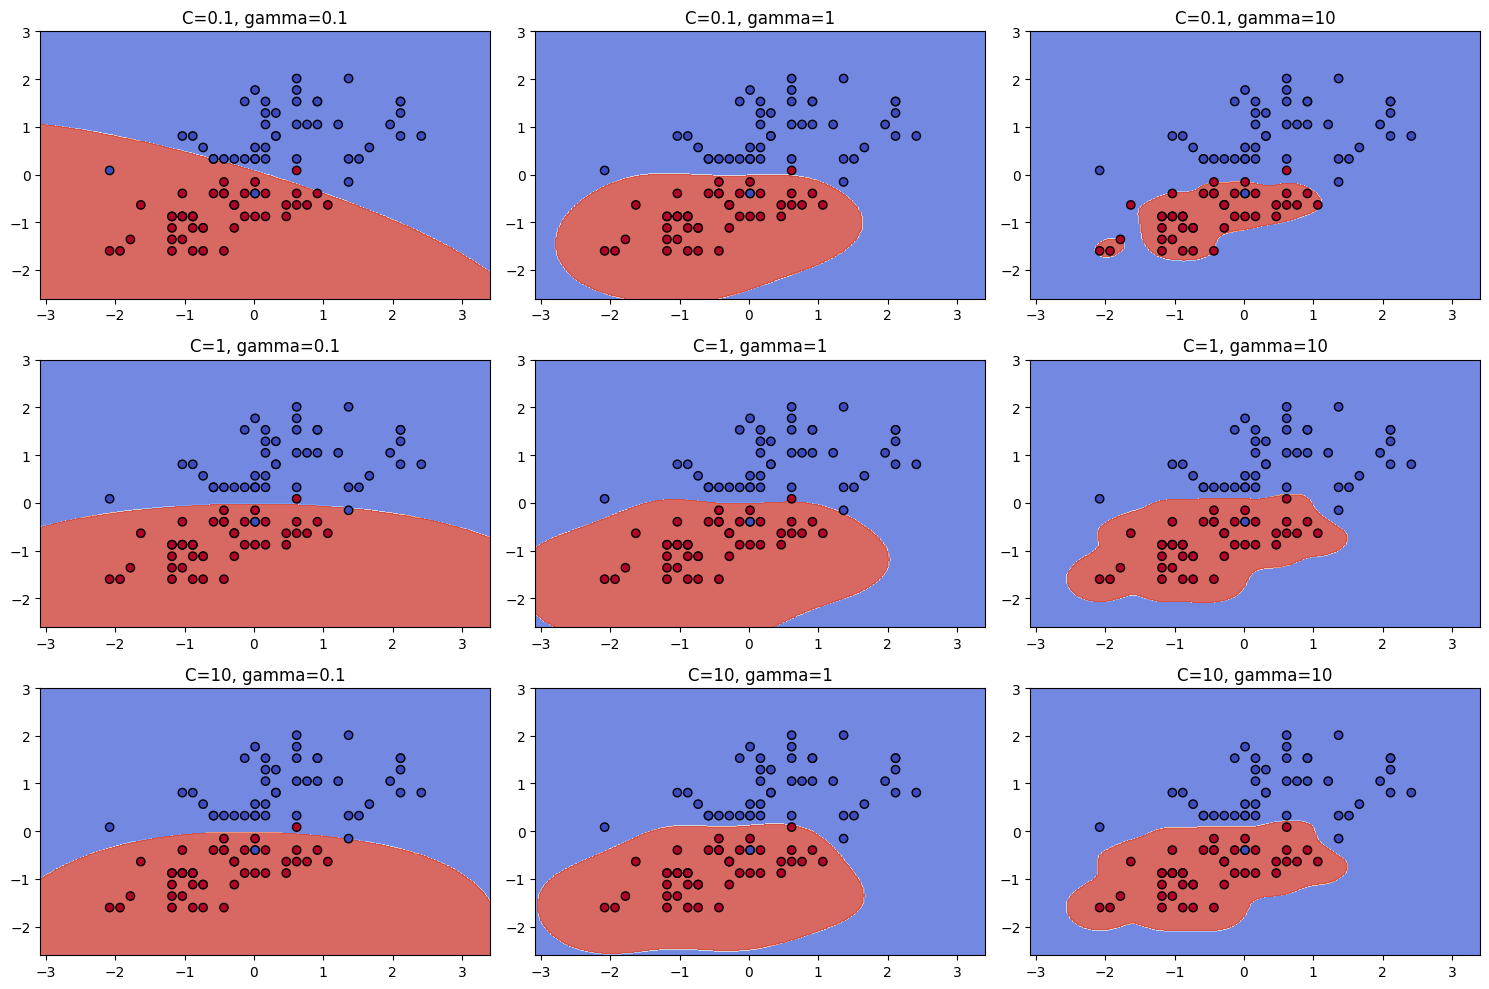

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Asumiendo que tienes dos conjuntos de datos: 'train_df' y 'test_df'
# Primero, selecciona solo las columnas que vas a utilizar para el entrenamiento y las etiquetas
features = ['sepal length', 'petal width']  # Reemplaza con las características que deseas usar
X_train = train_df[features].values
y_train = train_df['class'].map({'virginica': 0, 'versicolor': 1}).values  # Codifica las clases a valores numéricos

# Escala las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Valores de C y gamma para probar, en escala logarítmica
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

# Crear subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        ax = axes[i, j]
        # Entrena el modelo SVM
        svc = SVC(C=C, gamma=gamma)
        svc.fit(X_train_scaled, y_train)

        # Crea una malla de puntos para dibujar la frontera de decisión
        h = .02  # Tamaño del paso en la malla
        x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
        y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Predice las etiquetas para cada punto en la malla y redimensiona para el gráfico
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Dibuja la frontera de decisión y los puntos de datos
        ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
        ax.set_title(f'C={C}, gamma={gamma}')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Aqui se entreno otro modelo, con solo dos caracteristicas para asi poder graficar como cambia el funcionamiento con los diferentes parametros

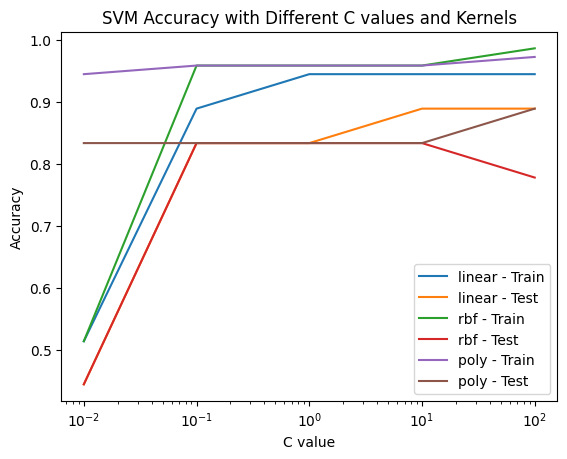

In [91]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Valores de C y tipos de kernel para probar
C_values = [0.01,0.1, 1, 10,100]
kernels = ['linear', 'rbf', 'poly']

# Almacenar resultados para la visualización
results = []

# Entrenar modelos y evaluar precisión
for kernel in kernels:
    for C in C_values:
        svc = SVC(C=C, kernel=kernel)
        svc.fit(X_train_scaled, y_train)
        train_accuracy = accuracy_score(y_train, svc.predict(X_train_scaled))
        test_accuracy = accuracy_score(y_test, svc.predict(X_test_scaled))
        results.append({'C': C, 'Kernel': kernel, 'Training Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})

# Convertir resultados en un DataFrame para facilitar la visualización
results_df = pd.DataFrame(results)

# Gráfico de rendimiento
for kernel in kernels:
    subset = results_df[results_df['Kernel'] == kernel]
    plt.plot(subset['C'], subset['Training Accuracy'], label=f'{kernel} - Train')
    plt.plot(subset['C'], subset['Test Accuracy'], label=f'{kernel} - Test')

plt.legend()
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy with Different C values and Kernels')
plt.show()


Entrnado el SVM con diferentes hiperparametros vemos como cada uno obtiene diferestes resultados y devemos escoger el que tenga mejores resultados para poder predecir.

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


iris_df = iris_df_filtered.sample(frac=1).reset_index(drop=True)

# Separa las clases
versicolor = iris_df[iris_df['class'] == 'versicolor']
virginica = iris_df[iris_df['class'] == 'virginica']

# Selecciona 5 muestras aleatorias de cada clase para el conjunto de prueba
versicolor_test = versicolor.sample(10)
virginica_test = virginica.sample(10)

# Concatena las muestras de prueba en un único DataFrame
test_df = pd.concat([versicolor_test, virginica_test])

# Elimina las muestras de prueba del DataFrame original para obtener el conjunto de entrenamiento
train_df = iris_df.drop(test_df.index)

# Ahora tienes tus conjuntos de entrenamiento y prueba
print("Conjunto de Entrenamiento:")
print(train_df)
print("\nConjunto de Prueba:")
print(test_df)

# Si necesitas las características y las etiquetas por separado:
X_train = train_df[['sepal length', 'sepal width', 'petal width']]
y_train = train_df['class']
X_test = test_df[['sepal length', 'sepal width', 'petal width']]
y_test = test_df['class']

Conjunto de Entrenamiento:
    sepal length  sepal width  petal width       class
0            6.3          2.5          1.9   virginica
1            6.7          2.5          1.8   virginica
2            5.7          2.8          1.3  versicolor
3            6.6          3.0          1.4  versicolor
4            6.8          3.2          2.3   virginica
..           ...          ...          ...         ...
94           5.6          2.8          2.0   virginica
95           6.3          3.3          1.6  versicolor
97           5.5          2.6          1.2  versicolor
98           5.8          2.7          1.0  versicolor
99           5.8          2.7          1.2  versicolor

[80 rows x 4 columns]

Conjunto de Prueba:
    sepal length  sepal width  petal width       class
60           5.0          2.0          1.0  versicolor
82           5.7          2.6          1.0  versicolor
44           6.8          2.8          1.4  versicolor
75           6.5          2.8          1.5  versi

In [114]:
X_train.shape

min_on_training = X_train.min(axis=0)
min_on_training.shape

range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training.shape

X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))

print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
sepal length    0.0
sepal width     0.0
petal width     0.0
dtype: float64
Maximum for each feature
 sepal length    1.0
sepal width     1.0
petal width     1.0
dtype: float64


In [115]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Asumiendo que 'train_df' es tu DataFrame y ya está definido con los datos correctos

# Utilizamos todas las características disponibles, excepto la columna 'class'
features = train_df.drop('class', axis=1).columns
X = X_train_scaled
y = y_train



# Define la cuadrícula de parámetros a probar
param_grid = [
    {'kernel': ['rbf'],
     'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['linear'],
     'C': [0.001, 0.01, 0.1, 1, 10, 100]},
     {'kernel': ['poly'],
     'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

# Realiza la búsqueda en cuadrícula
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X, y)

# Muestra los mejores parámetros y la mejor puntuación de validación cruzada
print("Mejores parámetros: {}".format(grid_search.best_params_))
print("Mejor puntuación de validación cruzada: {:.2f}".format(grid_search.best_score_))

# Opcionalmente, puedes usar el mejor modelo encontrado para hacer predicciones
# Recuerda que necesitarás tener un 'X_test_scaled' que esté preparado de manera similar a 'X_train_scaled'
best_model = grid_search.best_estimator_
print(best_model)


Mejores parámetros: {'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}
Mejor puntuación de validación cruzada: 0.95
SVC(C=0.001, gamma=10)


Matriz de Confusión:
[[10  0]
 [ 1  9]]

Informe de Clasificación:
              precision    recall  f1-score   support

  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



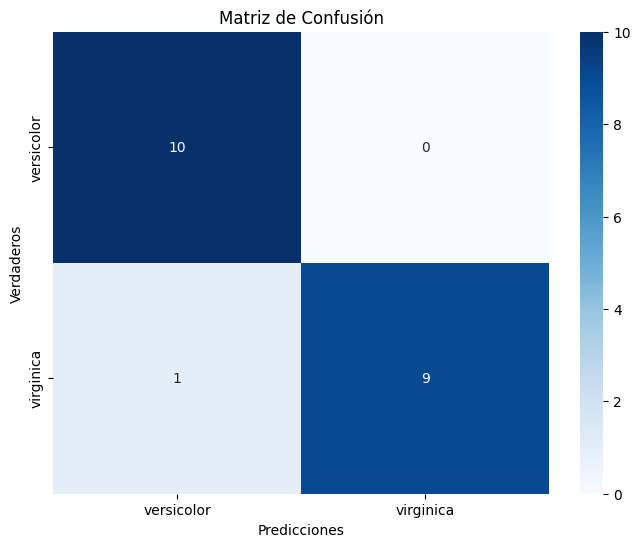

In [118]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test_scaled)

# Calcula la matriz de confusión y muestra el informe de clasificación
conf_mat = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_mat)
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualiza la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión")
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()


## Conclusión

SVM para este caso logro un muy buen resultados ya que apasar de ser datos no separables logra identificar correctamente las etiquetas a predecir, esto es gracias a que los datos se encuentran estandarizados, estan valanceadas las muestras, los hiperparametros son optimos y el modelo es muy potente